## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [7]:
# import Libararies
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

C:\Users\C L\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [3]:
# Read Data 
Data = np.genfromtxt("RegData.csv", delimiter=",")
Data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Explore your data

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
# Splite Data to X , Y
X = Data[:,0]
Y = Data[:,1]

#### Explore your data

#### Plot the original data (scatter plot of X,y)

<function matplotlib.pyplot.show(*args, **kw)>

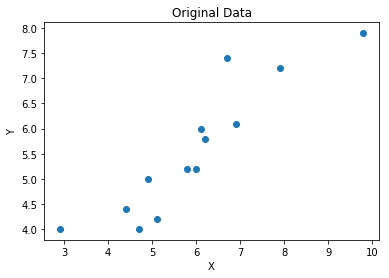

In [5]:
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

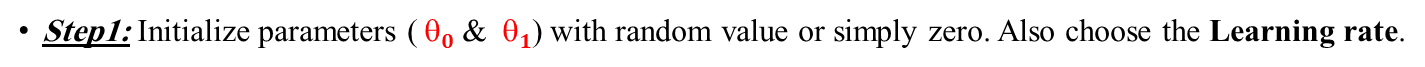

In [22]:
# # Define Theta0, and theta1 and X0 
# Theta0 , Theta1 , alpha = 0, 0, 0.001
# m = len(X)
# # X0 = np.array([1]*len(X))

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.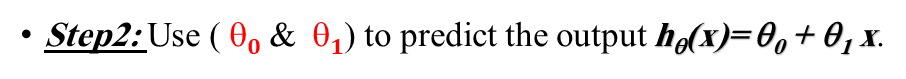
#### Note: you will need to iterate through all data points

In [23]:
# # defintion Hyposis function 
# def H (Theta0, Theta1):
#     h = Theta0 + Theat1*X
# #     print(h)
#     return h
# print(H (Theta0, Theta1))

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).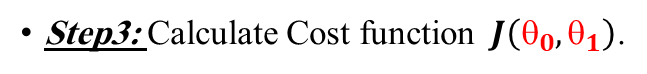
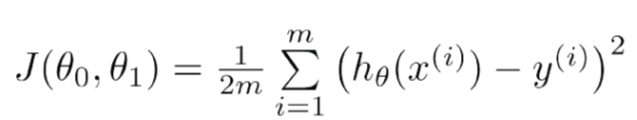

In [144]:
# # Define Cost Function
# def Cost (Theta0, Theta1):
#     z = H(Theta0, Theta1) - Y 
#     return (z @z )/(2*len(X))



### Step4: Calculate the gradient.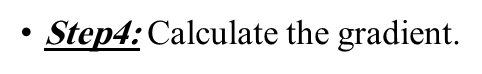
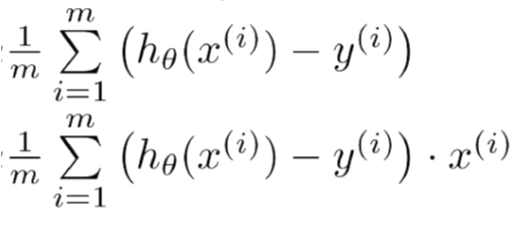

In [24]:
# Z = H(Theta0, Theat1) - Y
# GR_theta0 = (np.sum(Z/ m))* X0
# GR_theta1  = (np.sum((Z))/ m) * X
# GR_theta1

### Step5: Update the parameters (simultaneously).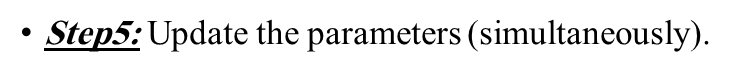
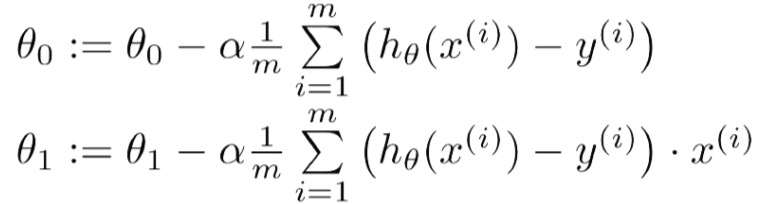

In [25]:
# # Update Theta0 and Theta1
# Theta0 = Theta0 - alpha*GR_theta0
# Theta1 = Theta1 - alpha*GR_theta1
# Theta1

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.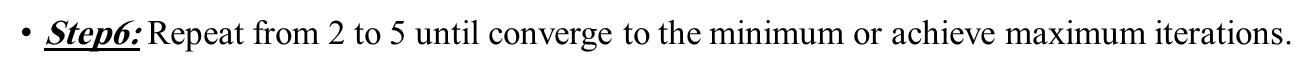

# This is the final version of the implemented Batch GD algorithm for single variable 
#### with Coose the suitable number of iterations, learning rate, and stop criteria.
#### and Calculate r2 score
#### Ploting  the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [11]:
# --- Batch GD for single variable linear regression with stop criteria ---

# defintion Hyposis function 
def H (Theta0, Theta1, X):
    h = Theta0 + Theta1*X
#     print(h)
    return h
# print(H (Theta0, Theta1))


# Define Cost Function
def Cost (Theta_0, Theta_1,X,Y):
    z = H(Theta_0, Theta_1, X) - Y 
    return (z @z )/(2*len(X))


def GD_single( X, Y, alpha, Max_iteration):
    # define Array cost to save All costs
    cost_val = []
    # define Array Y_predict to save All hypothesis output
    Y_predict = []
    
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    epoch = 0
    for i in range(Max_iteration):
        # Append Theta_0 and Theta_1 to save All 
        All_Theta_0.append(Theta_0)
        All_Theta_1.append(Theta_1)
        
        # save Cost 
        cost_val.append(Cost(Theta_0, Theta_1,X,Y))
        
        # calc hypothesis
        Y_predict = H(Theta_0, Theta_1, X) # return array
        Z = Y_predict - Y
        GR_theta0  = (np.sum(Z))/ len(X)
        GR_theta1  = (np.sum(Z * X))/ len(X)
        
        # Update Theta0 and Theta1
        Theta_0 = Theta_0 - alpha*GR_theta0
        Theta_1 = Theta_1 - alpha*GR_theta1
        if (abs(cost_val[i]-cost_val[i-1] ) < 0.001 and i>0):
            epoch = i+2
            break
    # save last update
    All_Theta_0.append(Theta_0)
    All_Theta_1.append(Theta_1)
    cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
    return All_Theta_0, All_Theta_1, cost_val, Y_predict, epoch


In [ ]:
# Read Data 
Data = np.genfromtxt("RegData.csv", delimiter=",")
Data

# Splite Data to X , Y
X = Data[:,0]
Y = Data[:,1]

In [12]:
# Coose the suitable number of iterations, learning rate, and stop criteria.
alpha = 0.001
iteration = 100
Theta_0_all, Theta_1_all, loss , Y_predict, epochs = GD_single( X, Y, alpha, iteration) 

In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_predict)
print(r2)

0.7333176762950011


In [14]:
print(len(loss),"  number of epochs : ",epochs )

93   number of epochs :  93


<function matplotlib.pyplot.show(*args, **kw)>

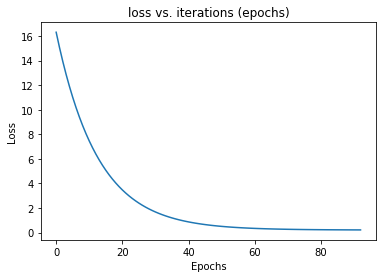

In [15]:
plt.plot( np.arange(epochs),loss)
plt.title('loss vs. iterations (epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

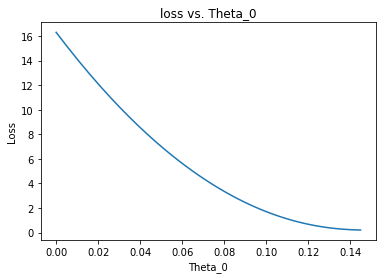

In [16]:
plt.plot(Theta_0_all,loss)
plt.title('loss vs. Theta_0')
plt.ylabel('Loss')
plt.xlabel('Theta_0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

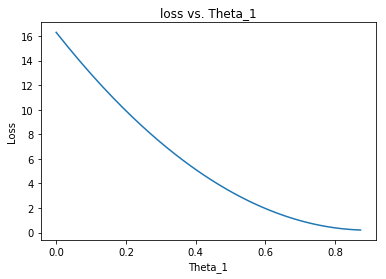

In [17]:
plt.plot(Theta_1_all,loss)
plt.title('loss vs. Theta_1')
plt.ylabel('Loss')
plt.xlabel('Theta_1')
plt.show

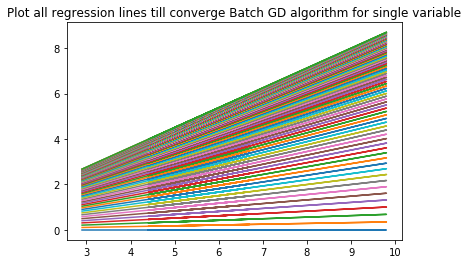

In [21]:
for theta0 , theta1 in zip(Theta_0_all,Theta_1_all):
    y_hat = theta0+ theta1*X
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge Batch GD algorithm for single variable')

<function matplotlib.pyplot.show(*args, **kw)>

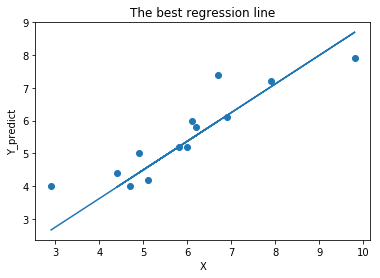

In [19]:
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show
plt.plot(X, Y_predict)
plt.title('The best regression line')
plt.xlabel('X')
plt.ylabel('Y_predict')
plt.show

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

<function matplotlib.pyplot.show(*args, **kw)>

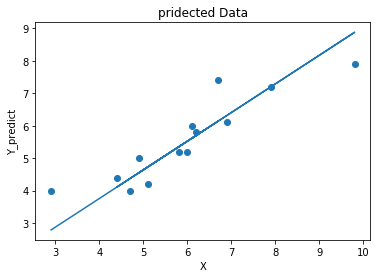

In [6]:
plt.scatter(X, Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show
plt.plot(X, Y_predict)
plt.title('pridected Data')
plt.xlabel('X')
plt.ylabel('Y_predict')
plt.show

#### Use R2 score to evaluate LR equation output
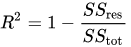
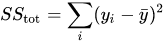
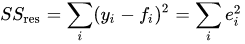
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_predict)
print(r2)

0.7562906753681113


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

<function matplotlib.pyplot.show(*args, **kw)>

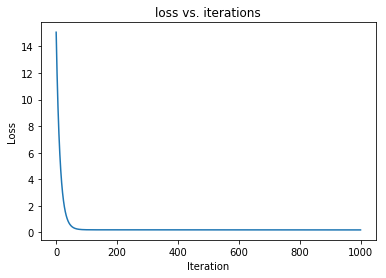

In [10]:
# plt.plot( np.arange(1000),cost_arr)
# plt.title('loss vs. iterations')
# plt.ylabel('Loss')
# plt.xlabel('Iteration')
# plt.show

<function matplotlib.pyplot.show(*args, **kw)>

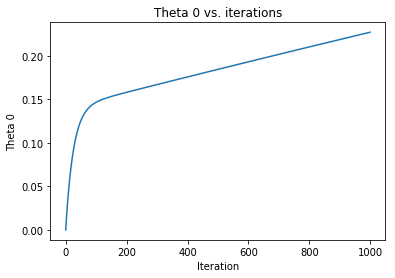

In [8]:
# plt.plot( np.arange(1000), Theta0_arr)
# plt.title('Theta 0 vs. iterations')
# plt.ylabel('Theta 0')
# plt.xlabel('Iteration')
# plt.show

In [10]:
# plt.plot( np.arange(1000), Theta1_arr)
# plt.title('Theta 1 vs. iterations')
# plt.ylabel('Theta 1')
# plt.xlabel('Iteration')
# plt.show

In [9]:
# # with Stop creiteria

# # defintion Hyposis function 
# def H (Theta0, Theta1):
#     h = Theta0 + Theta1*X
# #     print(h)
#     return h
# # print(H (Theta0, Theta1))


# # Define Cost Function
# def Cost (Theta0, Theta1):
#     z = H(Theta0, Theta1) - Y 
#     return (z @z )/(2*len(X))


# def GDFun2( X, Y, Theta0, Theta1, alpha):
#     # define Array cost to save cost
#     cost_val = []
#     # define Array Theta0 to save Theta0
#     Theta0_arr = []
#     # define Array Theta1 to save Theta0
#     Theta1_arr = []
#     i = 0
#     stop = True
#     while(stop):
# #         print(len(Theta0_arr))
#         Theta0_arr.append(Theta0)
#         Theta1_arr.append(Theta1)
#         Z = H(Theta0, Theta1) - Y
#         GR_theta0  = (np.sum(Z))/ len(X)
#         GR_theta1  = (np.sum(Z * X))/ len(X)
        
#         # Update Theta0 and Theta1
#         Theta0 = Theta0 - alpha*GR_theta0
#         Theta1 = Theta1 - alpha*GR_theta1
#          # save Cost 
#         cost_val.append(Cost(Theta0, Theta1))

#         if (abs(cost_val[i]-cost_val[i-1] )< 0.001 and i>0):
#             stop = False
#         if (abs(np.linalg.norm([Theta0_arr[i],Theta1_arr[i]])-np.linalg.norm([Theta0_arr[i-1],Theta1_arr[i-1]]))<.001 and i>0):
#             stop = False
#         i+= 1

#     return i,Theta0_arr, Theta1_arr, cost_val
        

# # Define Theta0, and theta1 and X0 
# Theta0 , Theta1 , alpha = 0, 0, 0.001

# # X0 = np.array([1]*len(X))

# iteration, Theta0_arr, Theta1_arr, cost_arr = GDFun2( X, Y, Theta0, Theta1, alpha) 

# Y_p = H(Theta0_arr[-1], Theta1_arr[-1])
# # Y_predict = Theta0_arr[-1]+ Theta1_arr[-1]*X
# print('number of iteration ',iteration)

# from sklearn.metrics import r2_score
# r = r2_score(Y,Y_p)
# print(r)

In [8]:
# plt.plot( np.arange(iteration),cost_arr)
# plt.title('loss vs. iterations with Stop creiteria')
# plt.ylabel('Loss')
# plt.xlabel('Iteration')
# plt.show

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [1]:
# Read Data multi Variable from file MultipleLR
# DataM  = pd.read_csv('MultipleLR.csv', header=None)
import numpy as np
DataM = np.genfromtxt("MultipleLR.csv", delimiter=",")

In [2]:
X = DataM[:,:-1]
print(X)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]


In [3]:
#define X0 
X0 = np.array([1]*len(X[:,0])).reshape(-1,1)
X0

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [4]:
# convert x0 and x1 to matrix
Y = DataM[:,-1].reshape(-1,1)
X = np.concatenate((X0,X),axis = 1)
print("x\n",X.shape,'\nY\n',Y.shape)


x
 (25, 4) 
Y
 (25, 1)


### Repeat your implementation but for more than one variable

In [76]:
# with Stop creiteria for more than one variable

# defintion Hyposis function 
def H (X, theta):
    h = X@theta
#     print(h.shape)
    return h
# print(H (X, theta))


# Define Cost Function
def Costfun (x,y,theta):
    z = H (x, theta) - y 
#     print(z.shape)
#     print(len(y))
    c = np.sum(z*z)/(2*len(y))
#     print(c)
    return c
#     return (z.T @z )/(2*len(Y))


def GDFunmulti( X, Y, Theta, alpha,iterr):
    # define Array cost to save cost
    cost = []
#     cost = np.array()
    # define Array Theta1 to save Theta0
#     Theta_all = np.zeros(X.shape[1]).reshape(-1,1)
    Theta_all=np.array(Theta.reshape(1,-1))
#     print(Theta_all)
    num_iter = 0
    for i in range(iterr):
        # add Theta
#         Theta_all = np.append(Theta_all,Theta.reshape(1,-1),axis=0)
#         cost= np.append(cost,Costfun(X, Y,Theta))
        cost.append(Costfun(X, Y,Theta))
        Z = H(X, Theta) - Y
        GR_theta  = (Z.T@X)
        # Update Theta0 and Theta1
#         print(GR_theta.reshape(-1,1).shape)
#         print(Theta.shape)
        Theta = Theta - (alpha * GR_theta.reshape(-1,1))/len(Y)
         # add Theta
        Theta_all = np.append(Theta_all,Theta.reshape(1,-1),axis=0)
         # save Cost 
#         print(Costfun(X, Y,Theta))
#         cost.append(Costfun(X, Y,theta))
        num_iter +=1
        if (abs(cost[i]-cost[i-1] ) < 0.01 and i > 0):
            break

    # add last update 
#     Theta_all = np.append(Theta_all,Theta.reshape(1,-1),axis=0)
#     cost= np.append(cost,Costfun(X, Y,Theta))
    cost.append(Costfun(X, Y,Theta))

    return num_iter, cost,Theta_all
        

# Define Theta0, and theta1 and X0 
alpha = 0.00001
iterr = 100
TH = np.zeros(X.shape[1]).reshape(-1,1)
# print(theta.shape)
# # X0 = np.array([1]*len(X))

iteration, c,Theta_all = GDFunmulti( X, Y, TH, alpha, iterr) 
# Y_p = H(X, Theta_all.T)
Y_predict = H (X, Theta_all[-1])
print('number of iteration ',iteration)

# from sklearn.metrics import r2_score
# r = r2_score(Y,Y_p)
# print(r)
# print(Theta_all)

number of iteration  33


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

### Plot loss vs. iterations

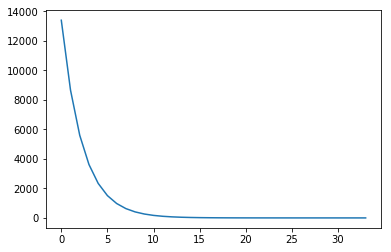

In [77]:
# print(c)
plt.plot(c)

<function matplotlib.pyplot.show(*args, **kw)>

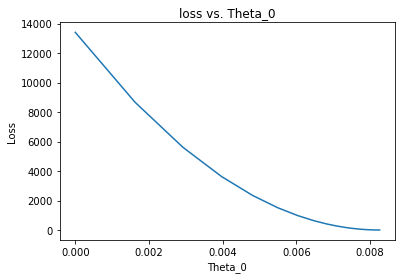

In [78]:
theta = 0
plt.plot(Theta_all[:,theta],c)
plt.title('loss vs. Theta_'+str(theta))
plt.ylabel('Loss')
plt.xlabel('Theta_'+str(theta))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

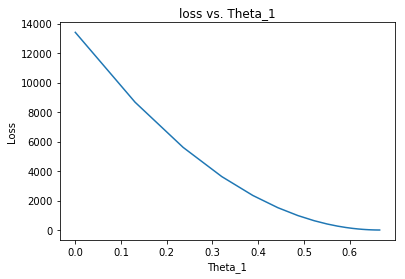

In [79]:
theta = 1
plt.plot(Theta_all[:,theta],c)
plt.title('loss vs. Theta_'+str(theta))
plt.ylabel('Loss')
plt.xlabel('Theta_'+str(theta))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

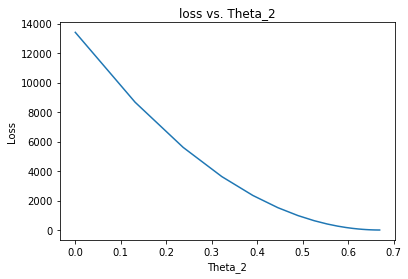

In [80]:
theta = 2
plt.plot(Theta_all[:,theta],c)
plt.title('loss vs. Theta_'+str(theta))
plt.ylabel('Loss')
plt.xlabel('Theta_'+str(theta))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

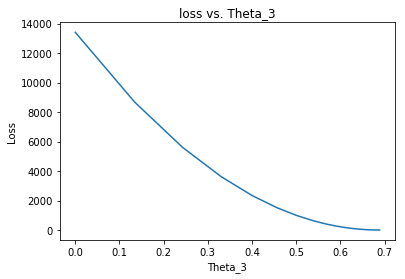

In [82]:
theta = 3
plt.plot(Theta_all[:,theta],c)
plt.title('loss vs. Theta_'+str(theta))
plt.ylabel('Loss')
plt.xlabel('Theta_'+str(theta))
plt.show

[0. 0. 0. 0.]
[0.0016204 0.130758  0.131472  0.1346708]
[0.00292321 0.2358829  0.23716984 0.24296626]
[0.00397067 0.32039811 0.32214459 0.33005527]
[0.00481281 0.38834259 0.39045742 0.40009371]
[0.00548989 0.44296378 0.44537365 0.45642307]
[0.00603424 0.48687269 0.48951865 0.50172994]
[0.00647187 0.52216865 0.52500331 0.53817446]
[0.00682371 0.55053957 0.55352483 0.5674934 ]
[0.00710656 0.57334259 0.57644781 0.59108318]
[0.00733394 0.59166885 0.59486942 0.61006658]
[0.00751673 0.60639571 0.60967181 0.62534631]
[0.00766366 0.61822853 0.62156425 0.6376482 ]
[0.00778176 0.62773449 0.63111702 0.64755583]
[0.00787668 0.63536958 0.63878864 0.65553839]
[0.00795297 0.64150044 0.64494776 0.66197315]
[0.00801426 0.64642188 0.6498908  0.66716344]
[0.00806351 0.6503709  0.65385609 0.67135313]
[0.00810308 0.65353807 0.65703523 0.67473832]
[0.00813485 0.65607662 0.65958229 0.67747665]
[0.00816036 0.65810974 0.66162115 0.6796949 ]
[0.00818084 0.65973648 0.66325141 0.68149499]
[0.00819727 0.66103649 0

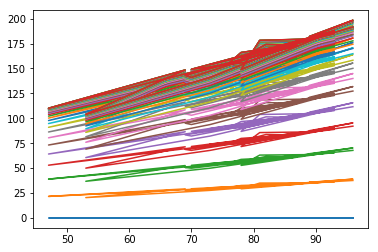

In [74]:
for theta  in Theta_all:
    print(theta)
    y_hat = H (X, theta)
    plt.plot(X[:,1],y_hat)

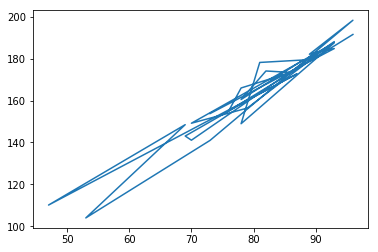

In [84]:
y_hat = H (X, Theta_all[-1])
plt.plot(X[:,1],y_hat)

#### Use R2 score to evaluate LR equation output

In [86]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
r2 = r2_score(Y,Y_predict)
print(r2)
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

G:\conda\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
G:\conda\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
G:\conda\lib\site-packages\sk

0.9789169214789403


0.9896615789448399

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [8]:
# Read Data 
Data = np.genfromtxt("RegData.csv", delimiter=",")
Data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

In [19]:
# Splite Data to X , Y
X = np.array(Data[:,0]).reshape(-1,1)
Y = np.array(Data[:,1]).reshape(-1,1)
print(np.array(X).reshape(1,-1))

[[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
  6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
  5.80000019]]


<function matplotlib.pyplot.show(*args, **kw)>

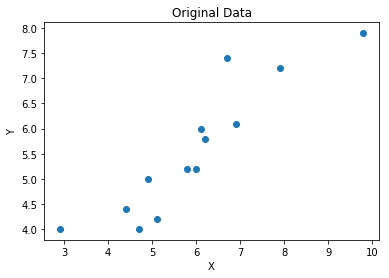

In [20]:
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

#### Train the model (fit the model to the training data)

In [23]:
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.8213156778363778

#### Predict y values using the trained model

In [25]:
Y_pred = reg.predict(Y)
print(Y_pred)

[[4.21222754]
 [6.57362687]
 [4.90675673]
 [6.43472083]
 [6.92089146]
 [5.67073878]
 [5.60128593]
 [5.46238022]
 [5.04566244]
 [4.35113325]
 [4.21222754]
 [4.49003928]
 [5.04566244]]


#### Plot model output (fitted line) with the original data (scatter plot of X,y)

<function matplotlib.pyplot.show(*args, **kw)>

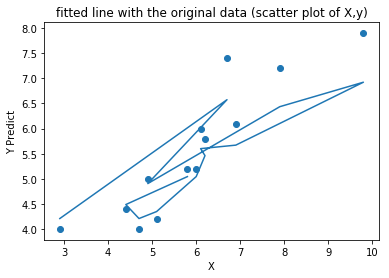

In [30]:
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

plt.plot(X,Y_pred)
plt.title('fitted line with the original data (scatter plot of X,y)')
plt.xlabel('X')
plt.ylabel('Y Predict')
plt.show

#### Use R2 score to evaluate model output

In [32]:
from sklearn.metrics import r2_score
r = r2_score(Y,Y_pred)
print(r)

0.8619341095371639


### Repeat for Mulivariate

In [43]:
# # with Stop creiteria for more than one variable

# # defintion Hyposis function 
# def H (X, theta):
#     h = X@theta
# #     print(h.shape)
#     return h
# # print(H (X, theta))


# # Define Cost Function
# def Costfun (X,y,theta):
#     z = H (X, theta) - Y 
# #     print(z.shape)
#     return (z.T @z )/(2*len(Y))


# def GDFunmulti( X, Y, Theta, alpha,iterr):
#     # define Array cost to save cost
#     cost = []
#     # define Array Theta1 to save Theta0
#     Theta_all = np.array(Theta.reshape(-1,1))
#     np.zeros(X.shape[1]+1).reshape(-1,1)
# #     print(Theta_all)
#     num_iter = 0
#     for i in range(iterr):
#         # add Theta
#         Theta_all = np.append(Theta_all,Theta.reshape(-1,1),axis=0)
#         cost = np.append(cost,Costfun(X, Y,Theta))
#         Z = H(X, Theta) - Y
#         GR_theta  = X.T@Z
#         # Update Theta0 and Theta1
#         Theta = Theta - alpha * GR_theta
#          # save Cost 
#         print(Costfun(X, Y,Theta))
# #         cost.append(Costfun(X, Y,theta))
#         num_iter +=1
# #         if (abs(cost[i]-cost[i-1] ) < 0.001 and i > 0):
# #             break

#     # add last update 
#     Theta_all = np.append(Theta_all,Theta.reshape(-1,1),axis=0)
#     cost.append(Costfun(X, Y,Theta))

#     return num_iter, cost,Theta_all
        

# # Define Theta0, and theta1 and X0 
# alpha = 0.01
# iterr = 100
# TH = np.array([0]*len(X[0])).reshape(-1,1)
# # print(theta.shape)
# # # X0 = np.array([1]*len(X))

# iteration, Theta_all, costs = GDFunmulti( X, Y, TH, alpha, iterr) 
# # Y_p = H(X, Theta_all.T)
# # Y_predict = H (X, theta[-1].T)
# print('number of iteration ',iteration)

# # from sklearn.metrics import r2_score
# # r = r2_score(Y,Y_p)
# # print(r)
# # print(Theta_all)

[[0. 0. 0. 0.]]
Bias =  [0.03419216]
Coefficients =  [[0.7225851 ]
 [0.23704158]
 [0.9042231 ]]


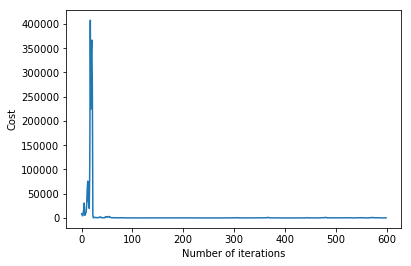

In [47]:
AllTheta ,theta, error_list = gradientDescent(X, Y)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

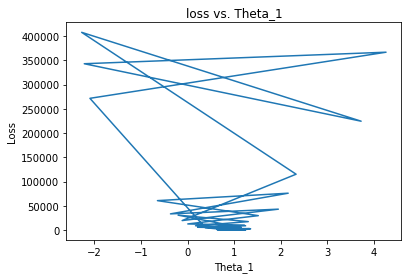

In [48]:
theta = 1
AllTheta = AllTheta[1:,:]
plt.plot(AllTheta[:,theta],error_list)
plt.title('loss vs. Theta_'+str(theta))
plt.ylabel('Loss')
plt.xlabel('Theta_'+str(theta))
plt.show

In [49]:
AllTheta[-1]

array([0.03419216, 0.7225851 , 0.23704158, 0.9042231 ])

<function matplotlib.pyplot.show(*args, **kw)>

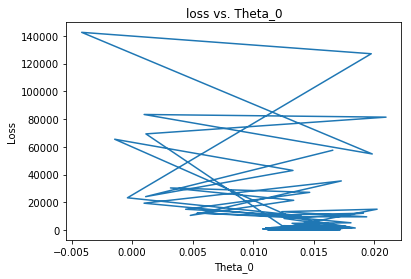

In [68]:
theta = 0
plt.plot(AllTheta[:,theta],error_list)
plt.title('loss vs. Theta_'+str(theta))
plt.ylabel('Loss')
plt.xlabel('Theta_'+str(theta))
plt.show